<a href="https://colab.research.google.com/github/JuliPolu/Deep_Learning_TensorFlow_Course/blob/main/Assignment_3_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [ ]:
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

print('train_data.shape', train_data.shape)
print('test_data.shape ', test_data.shape)

In [ ]:
boston_dataset = load_boston()
print(boston_dataset.keys())

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

train_df = pd.DataFrame(train_data, columns=column_names)
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [ ]:
scaler = MinMaxScaler((-1, 1))
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)

X_train

array([[-0.97243674, -1.        , -0.43695015, ...,  0.78723404,
         1.        , -0.06236203],
       [-0.99965269,  0.65      , -0.88489736, ..., -0.55319149,
         0.99233446, -0.92384106],
       [-0.89003245, -1.        ,  0.29325513, ...,  0.61702128,
         0.89217812, -0.91556291],
       ...,
       [-0.99936293, -0.3       , -0.58944282, ..., -0.08510638,
         0.82525594, -0.66335541],
       [-0.95182954, -1.        ,  0.40175953, ..., -0.55319149,
         0.31943114, -0.22406181],
       [-0.99981859,  0.2       , -0.81891496, ..., -0.36170213,
         0.898129  , -0.85375276]])

# Задание 1

### Модель 1.  
- Функция активации - relu  
- Количество слоев - 2
- Оптимизацтор - Adam
- Число нейронов в скрытом слое - [20, 30, 40, 50]

Epoch 1/150
3/3 [==============================] - 3s 305ms/step - loss: 531.4033 - mse: 531.4033 - val_loss: 618.4149 - val_mse: 618.4149
Epoch 2/150
3/3 [==============================] - 0s 117ms/step - loss: 528.9041 - mse: 528.9040 - val_loss: 615.8389 - val_mse: 615.8389
Epoch 3/150
3/3 [==============================] - 0s 95ms/step - loss: 526.4647 - mse: 526.4647 - val_loss: 613.2758 - val_mse: 613.2758
Epoch 4/150
3/3 [==============================] - 0s 83ms/step - loss: 523.9887 - mse: 523.9887 - val_loss: 610.7242 - val_mse: 610.7242
Epoch 5/150
3/3 [==============================] - 0s 80ms/step - loss: 521.5483 - mse: 521.5483 - val_loss: 608.1703 - val_mse: 608.1703
Epoch 6/150
3/3 [==============================] - 0s 47ms/step - loss: 519.0408 - mse: 519.0408 - val_loss: 605.6135 - val_mse: 605.6135
Epoch 7/150
3/3 [==============================] - 0s 60ms/step - loss: 516.6472 - mse: 516.6472 - val_loss: 603.0369 - val_mse: 603.0369
Epoch 8/150
3/3 [===============

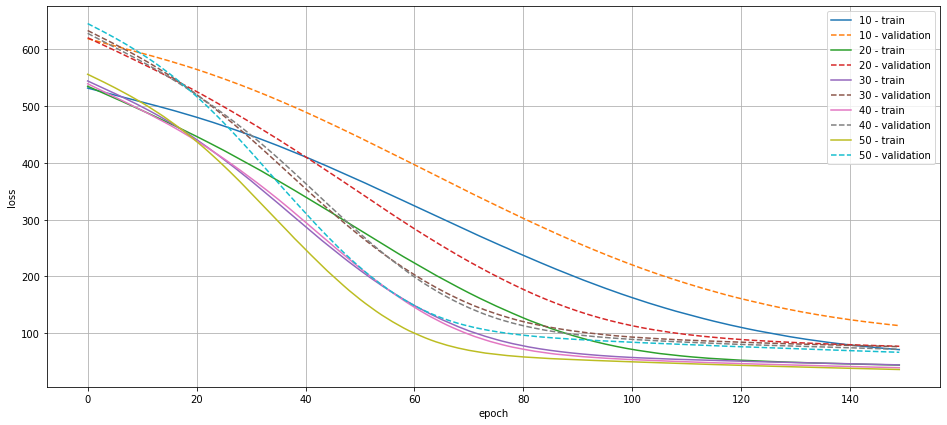

In [ ]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

for neuron_num in [10, 20, 30, 40, 50]:

  # Build the model.
  model = Sequential([ Dense(neuron_num,
                             activation='relu',
                             input_shape=(13,)),
                       Dense(1,
                             activation='linear')])

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120,
      validation_split=0.3
  )

  # результаты
  model_name = f'Model of {neuron_num} neurons'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]

  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{neuron_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{neuron_num} - validation')

plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Заметим, что потребовалось сравнительно много итераций для выхода ошибки на пологий уровень

In [ ]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
4,Model of 50 neurons,36.232815,66.523827
3,Model of 40 neurons,39.389561,71.808395
2,Model of 30 neurons,44.388443,76.422302
1,Model of 20 neurons,44.045216,77.075706
0,Model of 10 neurons,71.182312,113.437294


### Модель 2.  
- Функция активации - relu  
- Количество слоев - [2, 3, 5, 10]
- Оптимизацтор - Adam
- Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 1s 85ms/step - loss: 561.0161 - mse: 561.0161 - val_loss: 649.0536 - val_mse: 649.0536
Epoch 2/150
3/3 [==============================] - 0s 21ms/step - loss: 555.8092 - mse: 555.8092 - val_loss: 643.5400 - val_mse: 643.5400
Epoch 3/150
3/3 [==============================] - 0s 28ms/step - loss: 550.5441 - mse: 550.5441 - val_loss: 637.9319 - val_mse: 637.9319
Epoch 4/150
3/3 [==============================] - 0s 27ms/step - loss: 545.3035 - mse: 545.3035 - val_loss: 632.2963 - val_mse: 632.2963
Epoch 5/150
3/3 [==============================] - 0s 28ms/step - loss: 539.8790 - mse: 539.8790 - val_loss: 626.5819 - val_mse: 626.5819
Epoch 6/150
3/3 [==============================] - 0s 25ms/step - loss: 534.4056 - mse: 534.4056 - val_loss: 620.7457 - val_mse: 620.7457
Epoch 7/150
3/3 [==============================] - 0s 18ms/step - loss: 528.8398 - mse: 528.8398 - val_loss: 614.7960 - val_mse: 614.7960
Epoch 8/150
3/3 [=================

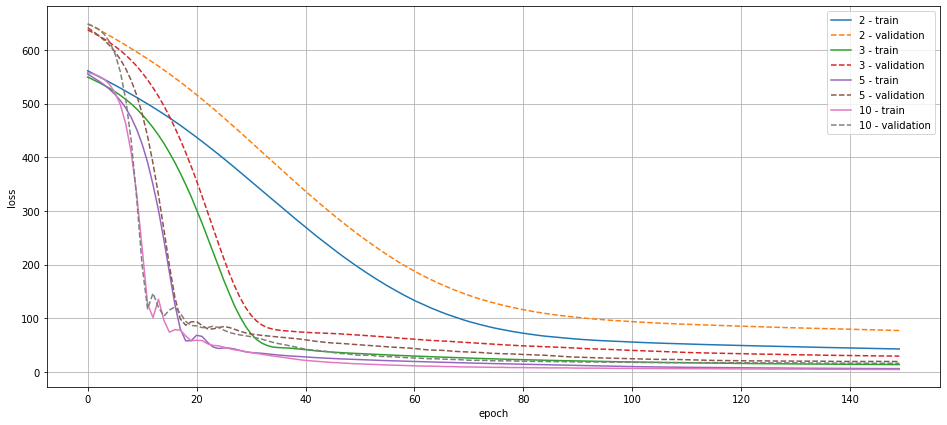

In [ ]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40

for layers_num in [2, 3, 5, 10]:

  layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation='relu'))
  layers_.append(Dense(1, activation='linear'))

  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120,
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {layers_num} layers'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]

  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{layers_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{layers_num} - validation')

plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
3,Model with 10 layers,4.370361,15.990719
2,Model with 5 layers,6.020782,19.260574
1,Model with 3 layers,13.514020,29.265821
0,Model with 2 layers,42.605694,77.020615


В данном случае наибольшее количество слоев показало наилучший результат. Стоит заметить, что график потерь модели из 10 слоев, не всегда монотонен

### Модель 3.  
- Функция активации - relu  
- Количество слоев - 10
- Оптимизацтор - ['adam', 'sgd', 'rmsprop']
- Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 3s 168ms/step - loss: 556.9518 - mse: 556.9518 - val_loss: 646.2664 - val_mse: 646.2664
Epoch 2/150
3/3 [==============================] - 0s 38ms/step - loss: 553.2120 - mse: 553.2120 - val_loss: 640.7029 - val_mse: 640.7029
Epoch 3/150
3/3 [==============================] - 0s 31ms/step - loss: 547.2676 - mse: 547.2676 - val_loss: 631.2777 - val_mse: 631.2777
Epoch 4/150
3/3 [==============================] - 0s 29ms/step - loss: 536.8560 - mse: 536.8560 - val_loss: 615.3110 - val_mse: 615.3110
Epoch 5/150
3/3 [==============================] - 0s 23ms/step - loss: 519.8392 - mse: 519.8392 - val_loss: 589.5806 - val_mse: 589.5806
Epoch 6/150
3/3 [==============================] - 0s 20ms/step - loss: 491.7510 - mse: 491.7510 - val_loss: 549.4706 - val_mse: 549.4706
Epoch 7/150
3/3 [==============================] - 0s 21ms/step - loss: 449.1408 - mse: 449.1408 - val_loss: 487.8445 - val_mse: 487.8445
Epoch 8/150
3/3 [================

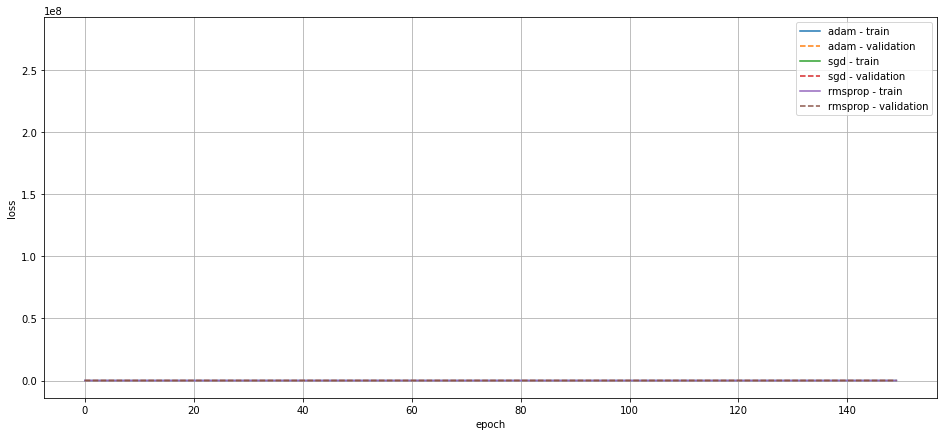

In [ ]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40
layers_num = 10

optimizers = ['adam', 'sgd', 'rmsprop']

for opt in optimizers:

  layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation='relu'))
  layers_.append(Dense(1, activation='linear'))

  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120,
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {opt} layers'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]

  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{opt} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{opt} - validation')

plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/4
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6974 - accuracy: 0.8097 - val_loss: 0.3374 - val_accuracy: 0.9055
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3141 - accuracy: 0.9100 - val_loss: 0.2717 - val_accuracy: 0.9211
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2585 - accuracy: 0.9262 - val_loss: 0.2300 - val_accuracy: 0.9343
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2233 - accuracy: 0.9367 - val_loss: 0.2076 - val_accuracy: 0.9390
Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4833 - accuracy: 0.6201 - val_loss: 0.9191 - val_accuracy: 0.7967
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7624 - accuracy: 0.8163 - val_loss: 0.6158 - val_accuracy: 0.8525
Epoch 3/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5788 - accuracy: 0.8507 - val_loss: 0.5081 - val_accuracy: 0.8712

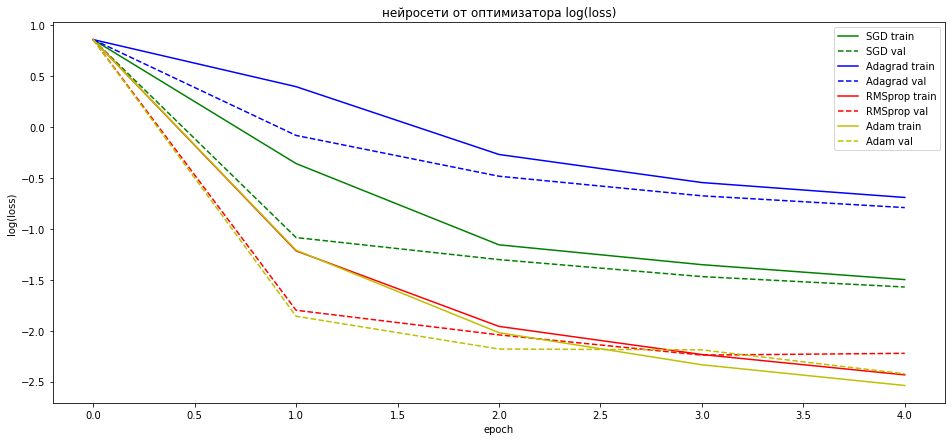

CPU times: user 2min 9s, sys: 14.9 s, total: 2min 23s
Wall time: 2min 27s


In [ ]:
%%time


# будем сохранять модели в словарь
models = {}


plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 4
batch_size = 32

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([keras.optimizers.gradient_descent_v2.SGD(),
                             keras.optimizers.adagrad_v2.Adagrad(),
                             keras.optimizers.rmsprop_v2.RMSprop(),
                             keras.optimizers.adam_v2.Adam()]):

    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(32, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])

    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')

    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )

    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    # картинки
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')
    print('=' * 20)

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [ ]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
2,Model with rmsprop layers,4.565170,16.176132
0,Model with adam layers,3.897103,18.377361
1,Model with sgd layers,NaN,NaN


В начале обучение меньшую ошибку дает оптимайзер rmsprop, однако затем лучший результат показывает adam

### Модель 4.  
- Функция активации - ['relu', 'tanh', 'linear', 'sigmoid']  
- Количество слоев - 10
- Оптимизацтор - adam
- Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 2s 304ms/step - loss: 557.7786 - mse: 557.7786 - val_loss: 647.7569 - val_mse: 647.7569
Epoch 2/150
3/3 [==============================] - 0s 31ms/step - loss: 554.9525 - mse: 554.9525 - val_loss: 643.8058 - val_mse: 643.8058
Epoch 3/150
3/3 [==============================] - 0s 21ms/step - loss: 550.8289 - mse: 550.8289 - val_loss: 637.7709 - val_mse: 637.7709
Epoch 4/150
3/3 [==============================] - 0s 29ms/step - loss: 544.4670 - mse: 544.4670 - val_loss: 628.3791 - val_mse: 628.3791
Epoch 5/150
3/3 [==============================] - 0s 34ms/step - loss: 534.1723 - mse: 534.1723 - val_loss: 613.5052 - val_mse: 613.5052
Epoch 6/150
3/3 [==============================] - 0s 21ms/step - loss: 518.3925 - mse: 518.3925 - val_loss: 589.8153 - val_mse: 589.8153
Epoch 7/150
3/3 [==============================] - 0s 22ms/step - loss: 493.0645 - mse: 493.0645 - val_loss: 551.8215 - val_mse: 551.8215
Epoch 8/150
3/3 [================

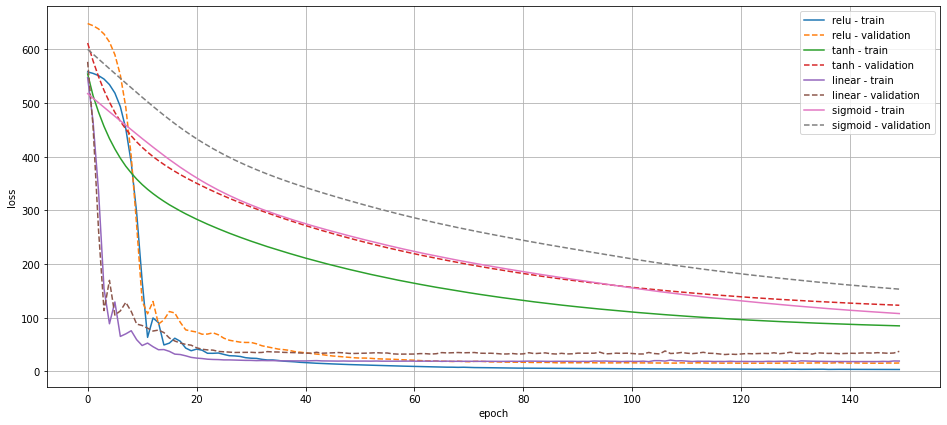

In [ ]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40
layers_num = 10
opt = 'adam'

activations = ['relu', 'tanh', 'linear', 'sigmoid']

for act in activations:

  layers_ = [Dense(neuron_num, activation=act, input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation=act))
  layers_.append(Dense(1, activation='linear'))

  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120,
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {act} activation'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]

  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{act} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{act} - validation')

plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
0,Model with relu activation,3.596279,15.687005
2,Model with linear activation,19.309162,37.384819
1,Model with tanh activation,84.850990,123.219742
3,Model with sigmoid activation,107.733063,153.218094


В данной задаче лучшие результаты показывают линейные результаты

# Задание 2. Подбор функций потерь и метрик


In [ ]:
losses = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']
metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']

In [ ]:
epochs = 200

result = []

neuron_num = 40
layers_num = 10
opt = 'adam'

In [ ]:
layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
for l in range(layers_num-2):
  layers_.append(Dense(neuron_num, activation='relu'))
layers_.append(Dense(1, activation='linear'))

# Build the model.
model = Sequential(layers_)

In [ ]:
for loss_ in losses:
    for metric_ in metrics:

        model.compile(optimizer=opt,
                      loss=loss_,
                      metrics=[metric_])

        model.fit(X_train,
                  train_target,
                  epochs=epochs,
                  batch_size=120,
                  validation_split=0.3)

        # Коэффициент детерминации на предсказании тестовой выборки
        y_test_pred = model.predict(X_test)

        [loss, metric] = model.evaluate(X_test, test_target, verbose=0)

        # накопление результатов
        result.append([loss_, loss, metric_, metric, r2_score(test_target, y_test_pred[:,0])])

Epoch 1/200
3/3 [==============================] - 2s 127ms/step - loss: 557.6425 - mean_squared_error: 557.6425 - val_loss: 647.8845 - val_mean_squared_error: 647.8845
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 555.1943 - mean_squared_error: 555.1943 - val_loss: 644.7369 - val_mean_squared_error: 644.7369
Epoch 3/200
3/3 [==============================] - 0s 27ms/step - loss: 552.0145 - mean_squared_error: 552.0145 - val_loss: 640.2128 - val_mean_squared_error: 640.2128
Epoch 4/200
3/3 [==============================] - 0s 20ms/step - loss: 547.3426 - mean_squared_error: 547.3426 - val_loss: 633.5928 - val_mean_squared_error: 633.5928
Epoch 5/200
3/3 [==============================] - 0s 32ms/step - loss: 540.4691 - mean_squared_error: 540.4691 - val_loss: 623.8070 - val_mean_squared_error: 623.8070
Epoch 6/200
3/3 [==============================] - 0s 20ms/step - loss: 530.3083 - mean_squared_error: 530.3083 - val_loss: 609.0807 - val_mean_squared_error: 

In [ ]:
result_table = pd.DataFrame(result, columns=['loss name', 'loss value', 'metric name', 'metric value', 'r2 score']).sort_values('r2 score', ascending=False)
result_table.head(10)

,loss name,loss value,metric name,metric value,r2 score
1,mean_squared_error,15.852636,mean_absolute_error,2.812804,0.809564
4,mean_absolute_error,2.960281,mean_absolute_error,2.960281,0.791596
2,mean_squared_error,17.542433,mean_absolute_percentage_error,16.357527,0.789265
3,mean_absolute_error,3.023425,mean_squared_error,17.637964,0.788117
0,mean_squared_error,17.784300,mean_squared_error,17.784300,0.786359
6,mean_absolute_percentage_error,16.199207,mean_squared_error,18.196968,0.781402
7,mean_absolute_percentage_error,16.028313,mean_absolute_error,3.041116,0.781077
5,mean_absolute_error,3.079524,mean_absolute_percentage_error,15.892403,0.779949
8,mean_absolute_percentage_error,16.327095,mean_absolute_percentage_error,16.327095,0.766467


Точность сети помогли улучшить:

- выбор активатора,
- подбор количества эпох
- выбор количества слоев и количества нейроно в них

Выбор метрики и функции потерь не всегда коррелируют друг с другом и "внешней" метрикой (в данном случае - r2 score)